In [1]:
# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Import the sightings_2025 dataset
data_mom = pd.read_csv('data/reports_by_month.csv')
data_mom.head()

,Sighting Year,Sighting Month,Count
0,2025.0,4,34
1,2025.0,3,311
2,2025.0,2,303
3,2025.0,1,539
4,2024.0,12,931


In [3]:
# Convert 'Sighting Year' and 'Sighting Month' to integers, handling NaN values
data_mom['Sighting Year'] = data_mom['Sighting Year'].fillna(0).astype(int)
data_mom['Sighting Month'] = data_mom['Sighting Month'].fillna(0).astype(int)

In [4]:
data_mom

,Sighting Year,Sighting Month,Count
0,2025,4,34
1,2025,3,311
2,2025,2,303
3,2025,1,539
4,2024,12,931
...,...,...,...
899,1905,7,2
900,1897,4,2
901,1864,5,2
902,1561,4,2


In [5]:
# Ensure 'Count' is an integer, handling NaN values
data_mom['Count'] = data_mom['Count'].fillna(0).astype(int)

In [6]:
# Sort the data by year and month
data_mom = data_mom.sort_values(['Sighting Year', 'Sighting Month'])

C:\Users\roddi\AppData\Local\Temp\ipykernel_29484\2776902686.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


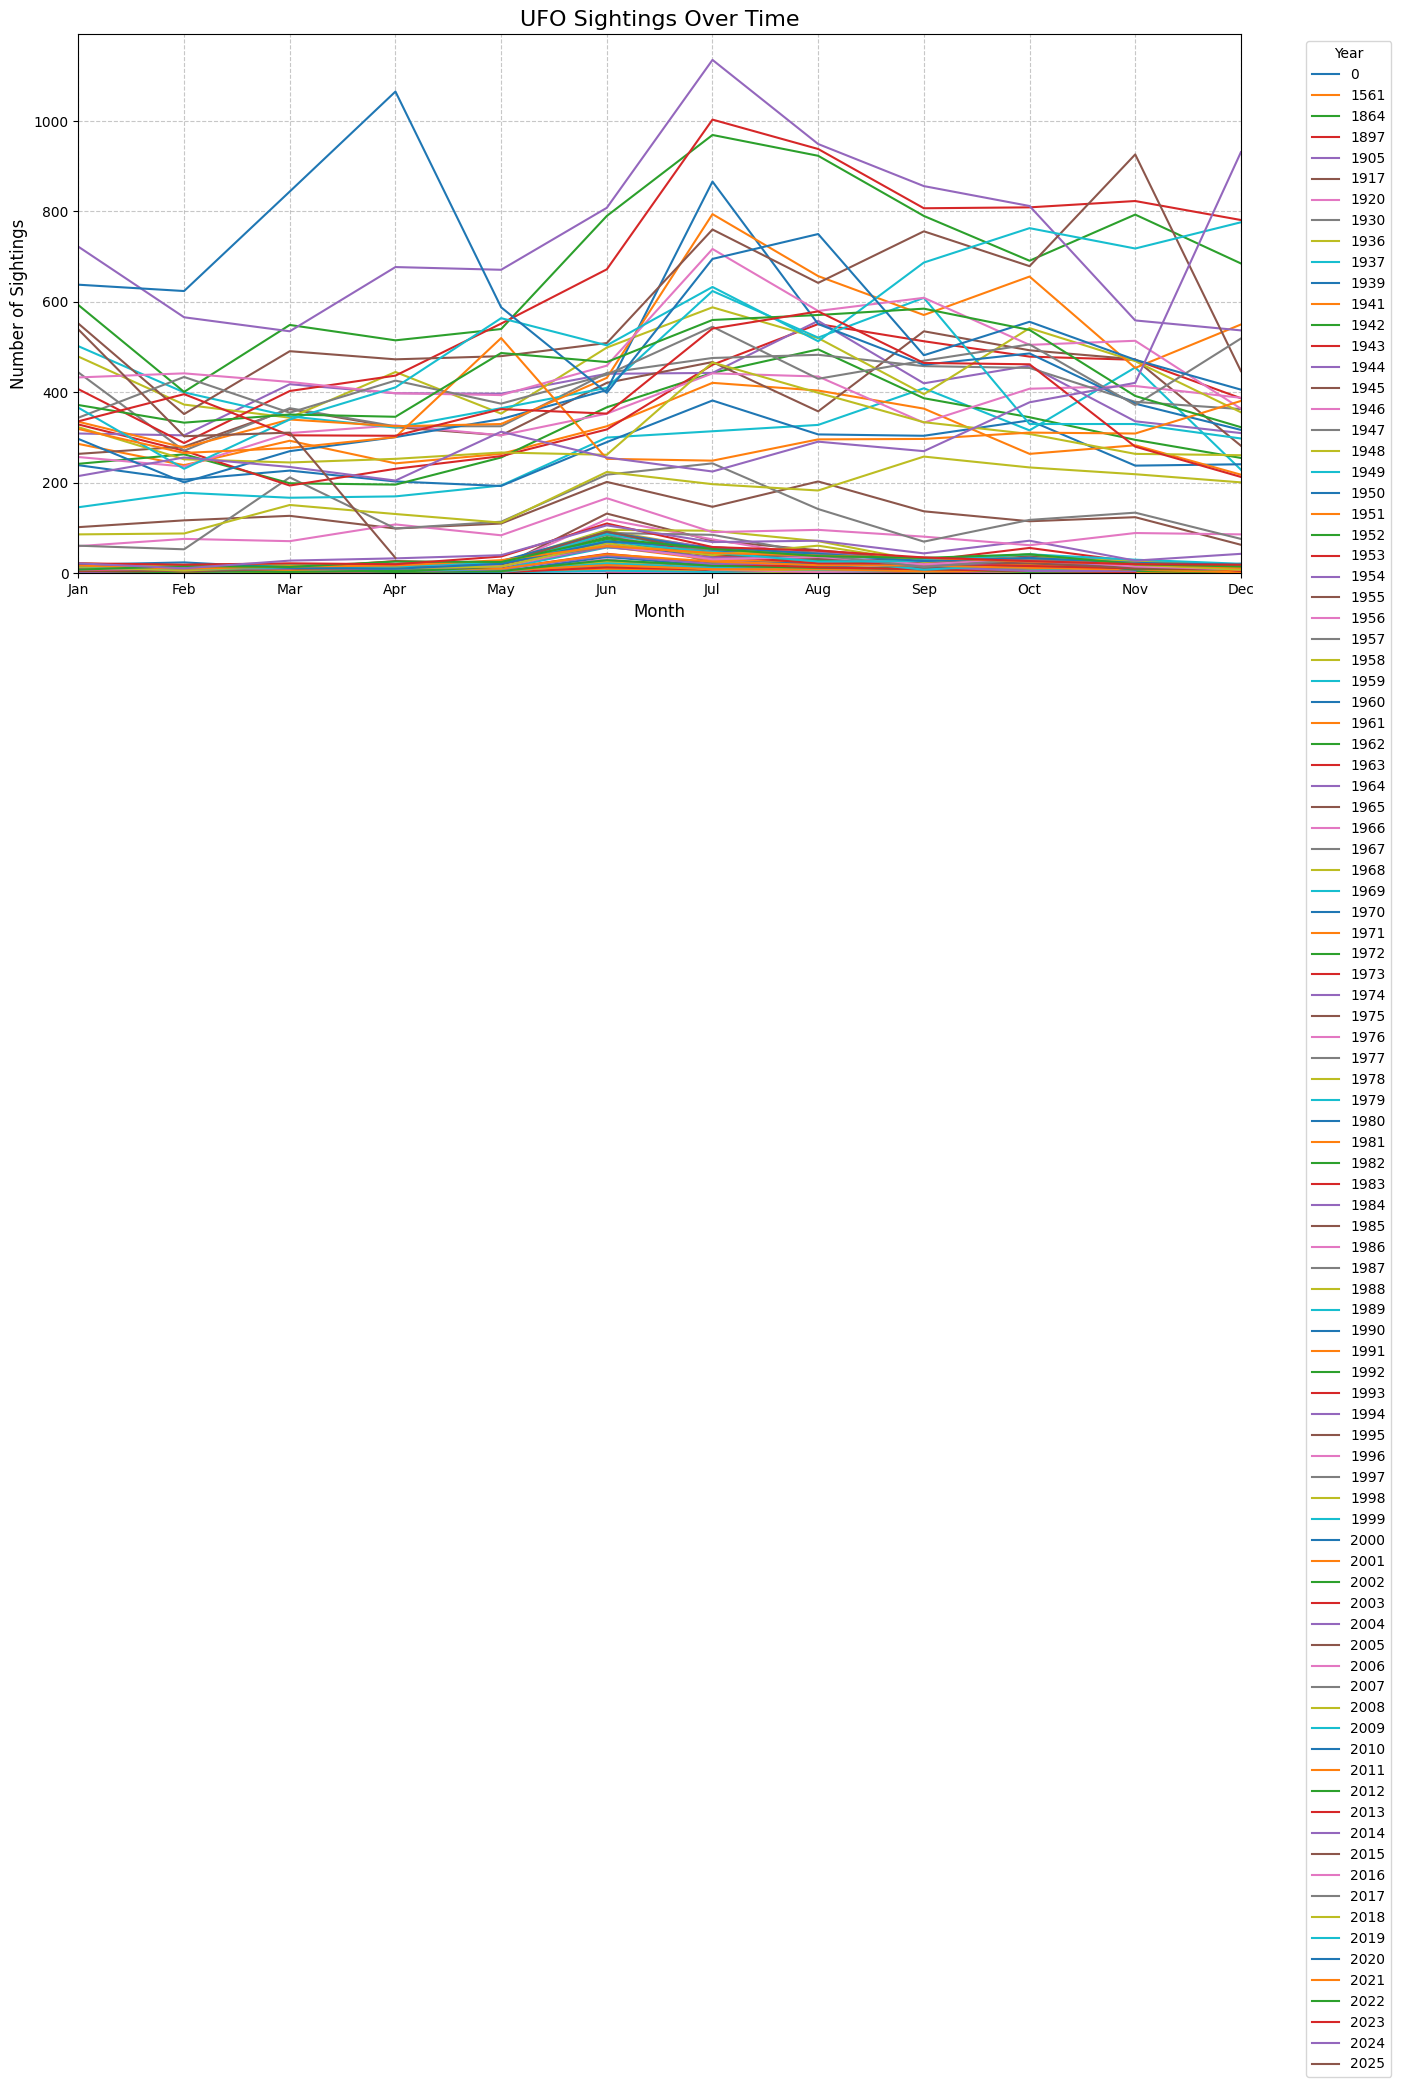

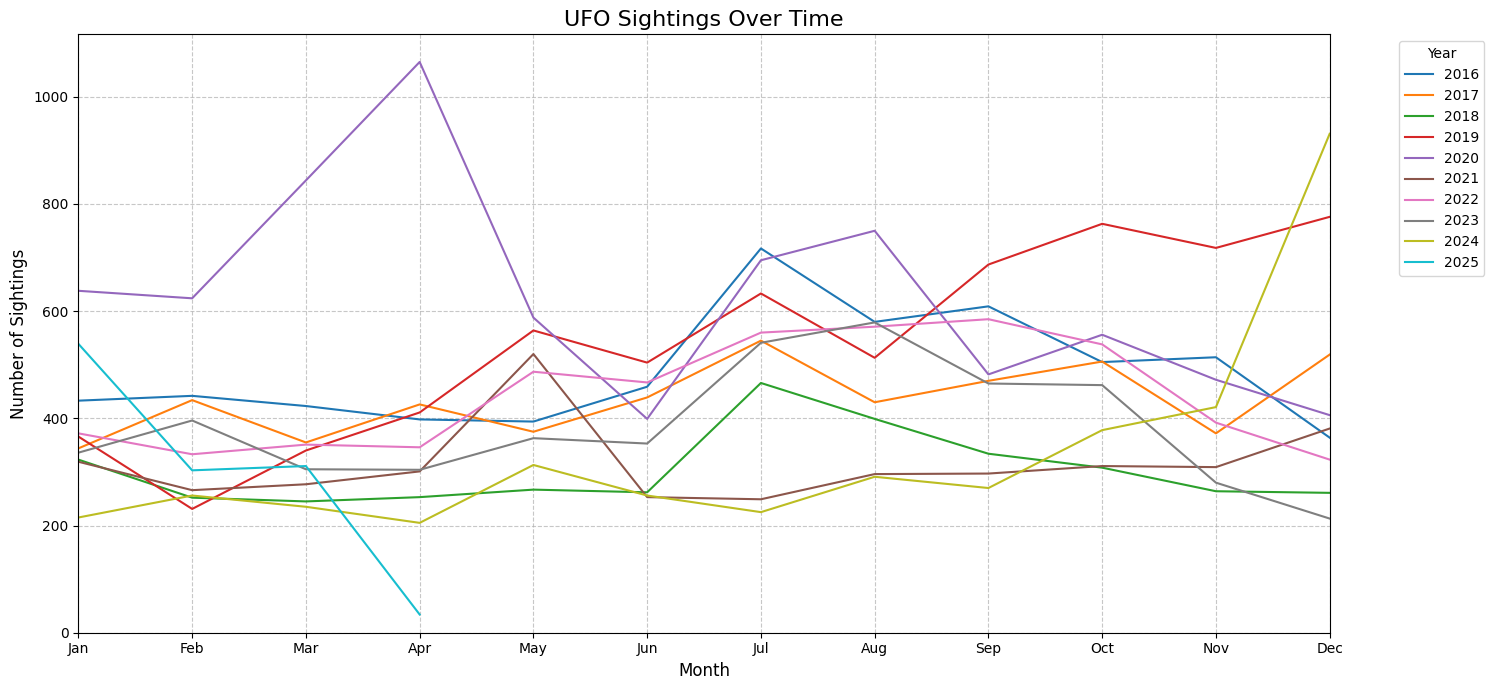

In [7]:
# 1. Time Series Plot
# Sort the data by year and month
data_mom_sorted = data_mom.sort_values(['Sighting Year', 'Sighting Month'])

# Create the plot
plt.figure(figsize=(15, 7))

# Plot the data
for year in data_mom_sorted['Sighting Year'].unique():
    year_data = data_mom_sorted[data_mom_sorted['Sighting Year'] == year]
    plt.plot(year_data['Sighting Month'], year_data['Count'], label=str(year))

# Customize the plot
plt.title('UFO Sightings Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Sightings', fontsize=12)

# Set x-axis ticks and labels
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Set the limits to start from 0
plt.xlim(1, 12)  # x-axis from January (1) to December (12)
plt.ylim(0, plt.ylim()[1])  # y-axis from 0 to the current maximum

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent cutting off the legend
plt.tight_layout()

# Show the plot
plt.show()



# Get the 10 most recent years
recent_years = sorted(data_mom_sorted['Sighting Year'].unique())[-10:]

plt.figure(figsize=(15, 7))

# Plot the data for the most recent 10 years
for year in recent_years:
    year_data = data_mom_sorted[data_mom_sorted['Sighting Year'] == year]
    plt.plot(year_data['Sighting Month'], year_data['Count'], label=str(year))

# Customize the plot
plt.title('UFO Sightings Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Sightings', fontsize=12)

# Set x-axis ticks and labels
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Set the limits to start from 0
plt.xlim(1, 12)  # x-axis from January (1) to December (12)
plt.ylim(0, plt.ylim()[1])  # y-axis from 0 to the current maximum

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent cutting off the legend
plt.tight_layout()

# Show the plot
plt.show()




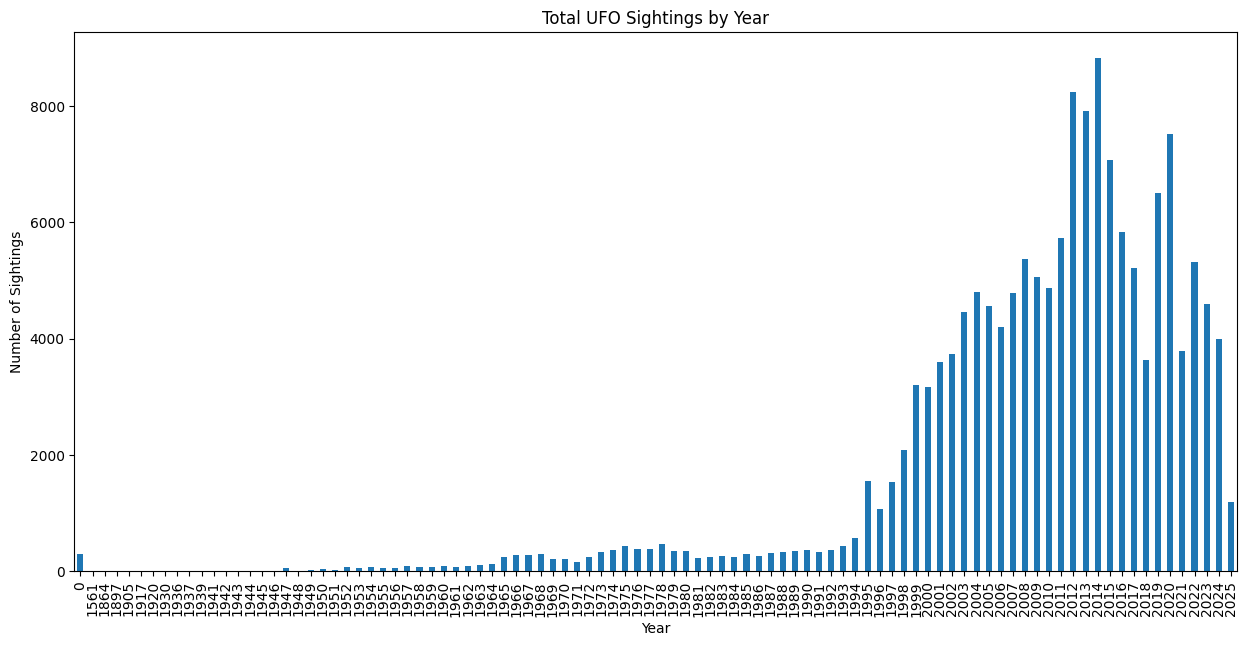

In [8]:
# 2. Yearly Totals
yearly_totals = data_mom.groupby('Sighting Year')['Count'].sum()
plt.figure(figsize=(15,7))
yearly_totals.plot(kind='bar')
plt.title('Total UFO Sightings by Year')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.show()



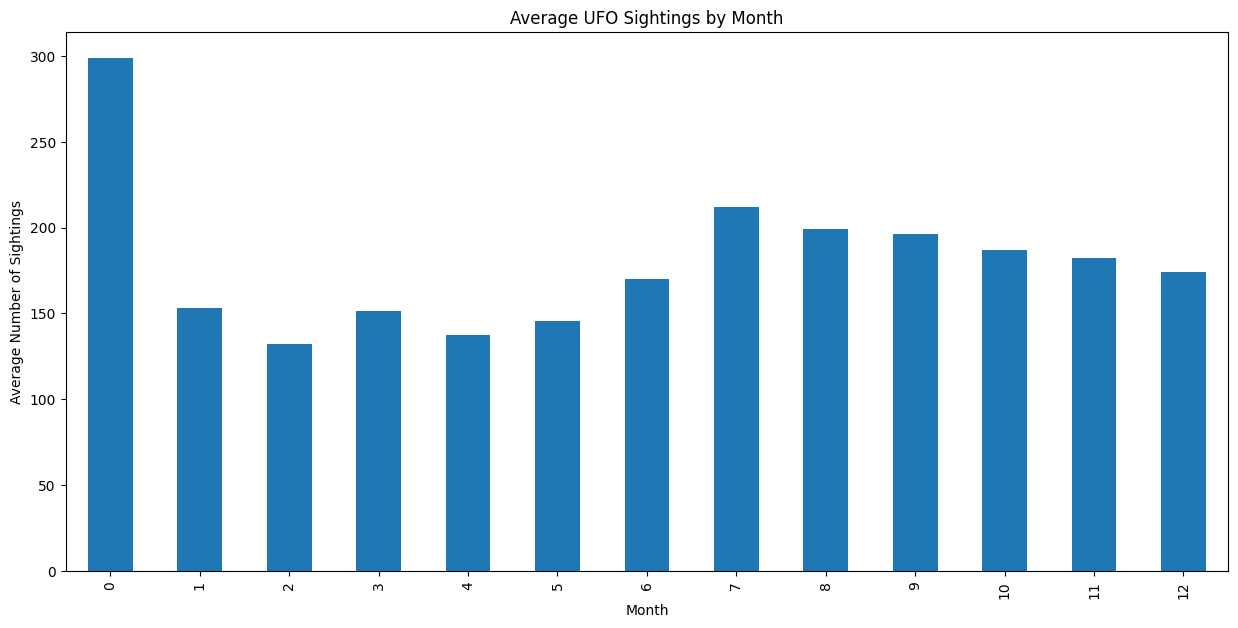

In [9]:
# 3. Monthly Averages
monthly_avg = data_mom.groupby('Sighting Month')['Count'].mean()
plt.figure(figsize=(15,7))
monthly_avg.plot(kind='bar')
plt.title('Average UFO Sightings by Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Sightings')
plt.show()

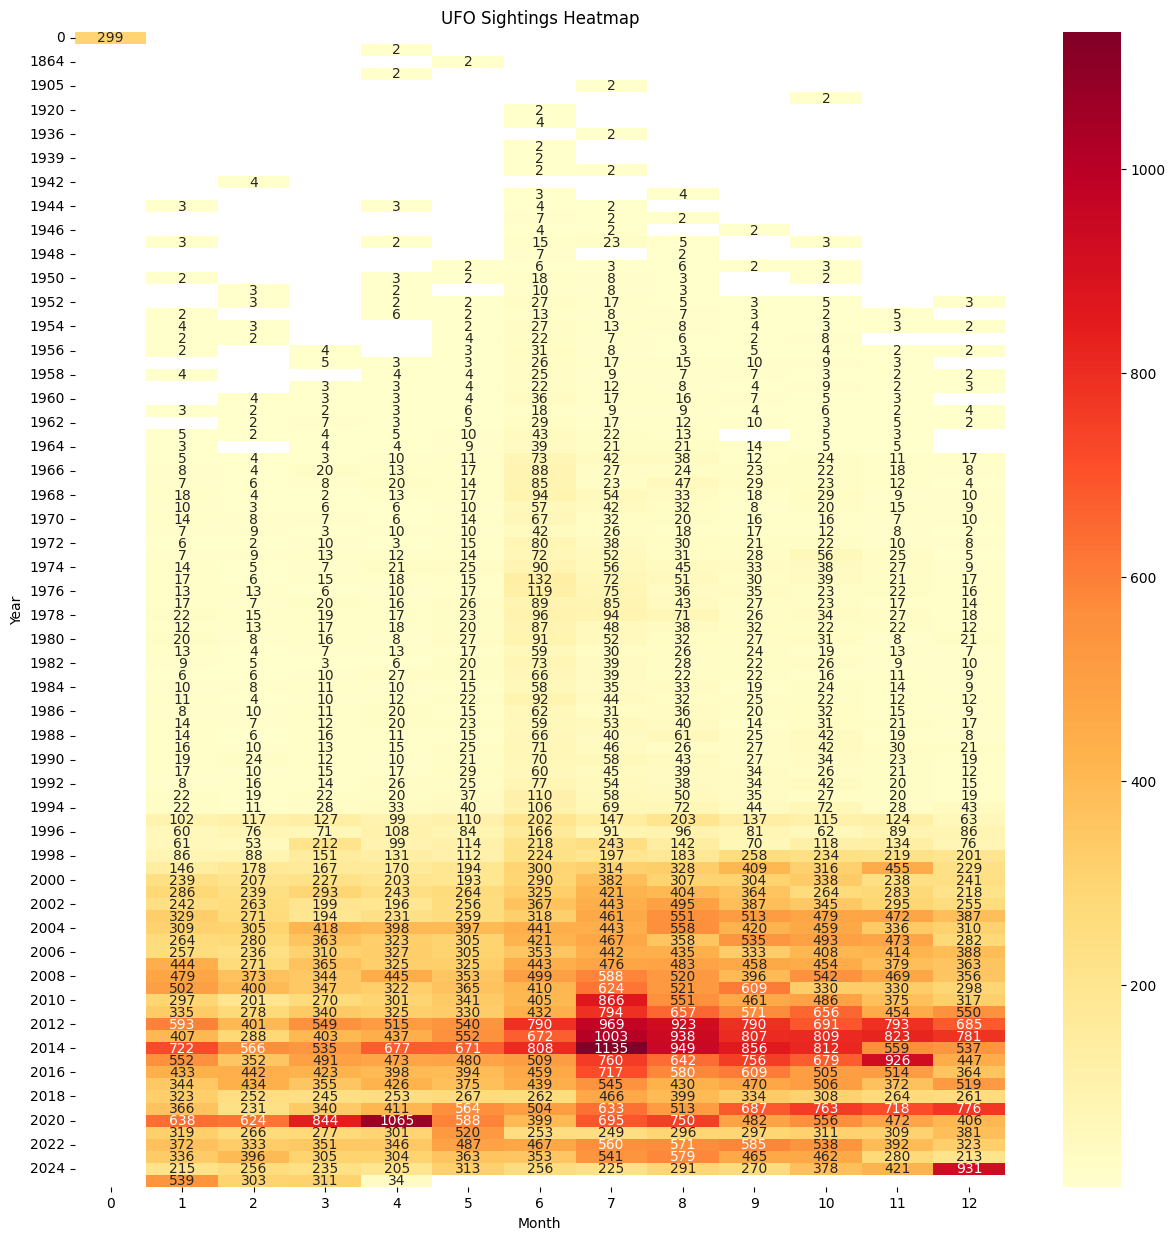

In [10]:
# 4. Heatmap
pivot_data = data_mom.pivot(index='Sighting Year', columns='Sighting Month', values='Count')
plt.figure(figsize=(15,15))
sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('UFO Sightings Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

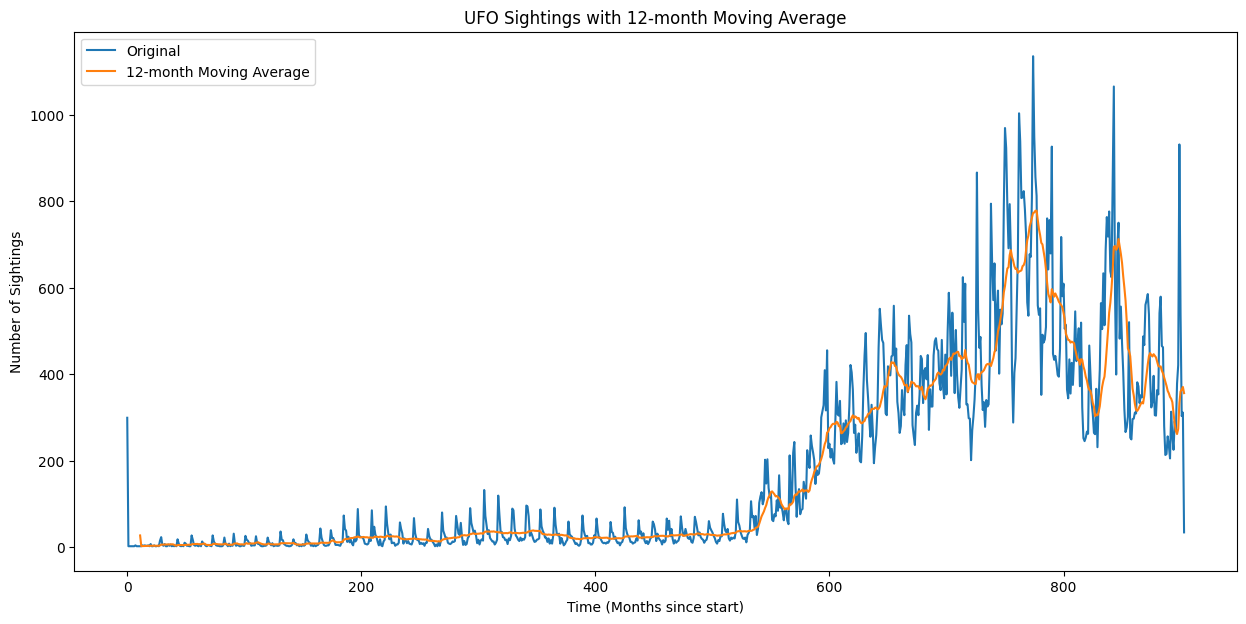

In [11]:
# 5. Moving Average
data_mom['MA12'] = data_mom['Count'].rolling(window=12).mean()
plt.figure(figsize=(15,7))
plt.plot(range(len(data_mom)), data_mom['Count'], label='Original')
plt.plot(range(len(data_mom)), data_mom['MA12'], label='12-month Moving Average')
plt.title('UFO Sightings with 12-month Moving Average')
plt.xlabel('Time (Months since start)')
plt.ylabel('Number of Sightings')
plt.legend()
plt.show()

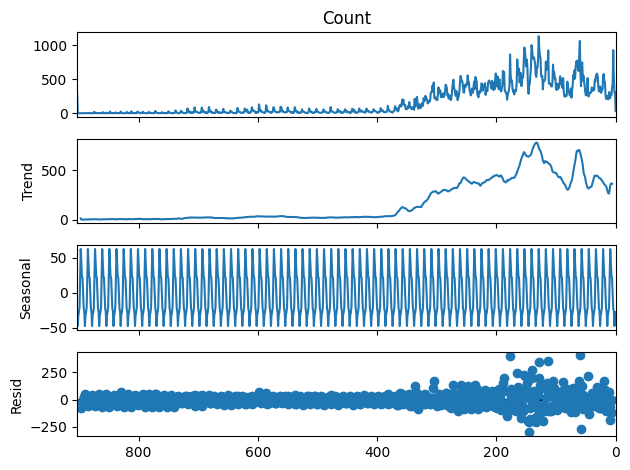

In [12]:
# 6. Seasonal Decomposition
#seasonal_decompose is a function from the statsmodels library that decomposes a time series into trend, seasonal, and residual components.
result = seasonal_decompose(data_mom['Count'], model='additive', period=12)
result.plot()
plt.show()

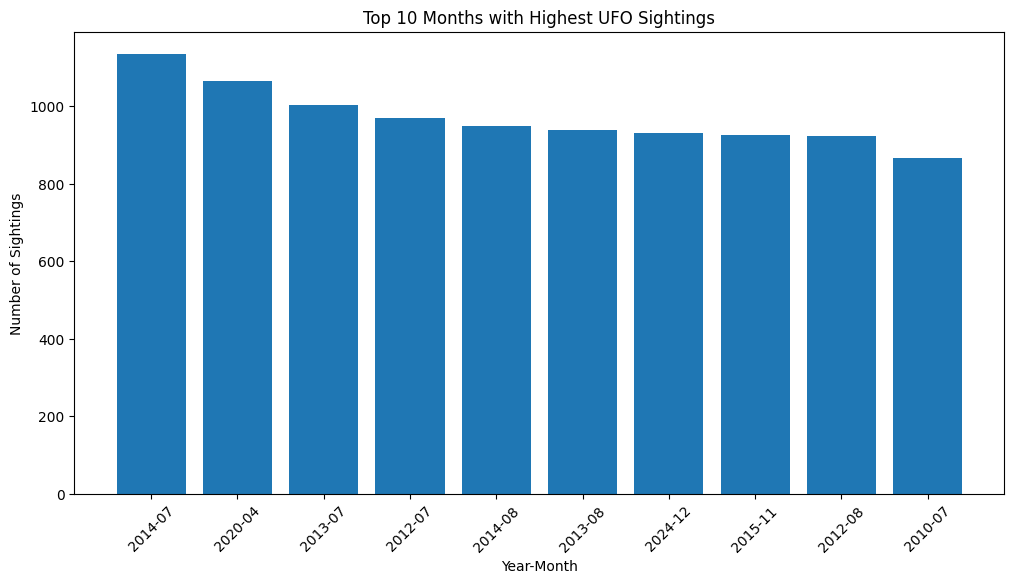

In [13]:
# 7. Top 10 Months with Highest Sightings
top_10_months = data_mom.nlargest(10, 'Count')
plt.figure(figsize=(12,6))
plt.bar(top_10_months['Sighting Year'].astype(str) + '-' + top_10_months['Sighting Month'].astype(str).str.zfill(2), top_10_months['Count'])
plt.title('Top 10 Months with Highest UFO Sightings')
plt.xlabel('Year-Month')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.show()


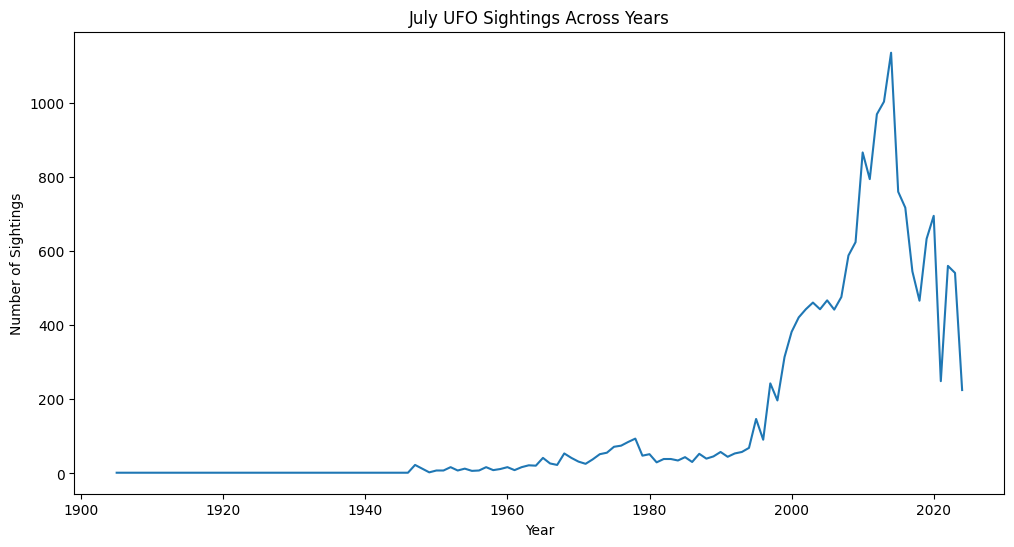

In [14]:
# 8. Year-over-Year Comparison for a Specific Month (July)
july_data = data_mom[data_mom['Sighting Month'] == 7]
plt.figure(figsize=(12,6))
plt.plot(july_data['Sighting Year'], july_data['Count'])
plt.title('July UFO Sightings Across Years')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.show()


In [15]:
# 9. Correlation between Year and Number of Sightings
yearly_sightings = data_mom.groupby('Sighting Year')['Count'].sum().reset_index()
correlation = yearly_sightings['Sighting Year'].corr(yearly_sightings['Count'])
print(f"Correlation between Year and Number of Sightings: {correlation:.2f}")

Correlation between Year and Number of Sightings: 0.18


In [16]:
# 10. Summary Statistics
print(data_mom['Count'].describe())

count     904.000000
mean      170.967920
std       223.222562
min         2.000000
25%        10.000000
50%        34.000000
75%       314.500000
max      1135.000000
Name: Count, dtype: float64
